<a href="https://colab.research.google.com/github/atodev/GoogleCloud/blob/master/BTC-LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Description: This program uses an artificial recurrent neural network called Long Short Term Memory(LSTM)
#to predict the closing stock price of a corporation (apple Inc.) using the past 60 day stock price.

In [1]:
import math
import pandas_datareader as web
import numpy as np
import pandas as pd 
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense,LSTM
#from tensorflow.keras.layers import  Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [2]:
#Get the stock quote
df = web.DataReader('BTC-USD', data_source='yahoo',start='2015-01-01', end = '2020-12-30')
#Show the data
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2015-01-01,320.434998,314.002991,320.434998,314.248993,8.036550e+06,314.248993
2015-01-02,315.838989,313.565002,314.079010,315.032013,7.860650e+06,315.032013
2015-01-03,315.149994,281.082001,314.846008,281.082001,3.305440e+07,281.082001
2015-01-04,287.230011,257.612000,281.145996,264.195007,5.562910e+07,264.195007
2015-01-05,278.341003,265.084015,265.084015,274.473999,4.396280e+07,274.473999
...,...,...,...,...,...,...
2020-12-27,28288.839844,25922.769531,26439.373047,26272.294922,6.647990e+10,26272.294922
2020-12-28,27389.111328,26207.640625,26280.822266,27084.808594,4.905674e+10,27084.808594
2020-12-29,27370.720703,25987.298828,27081.810547,27362.437500,4.526595e+10,27362.437500


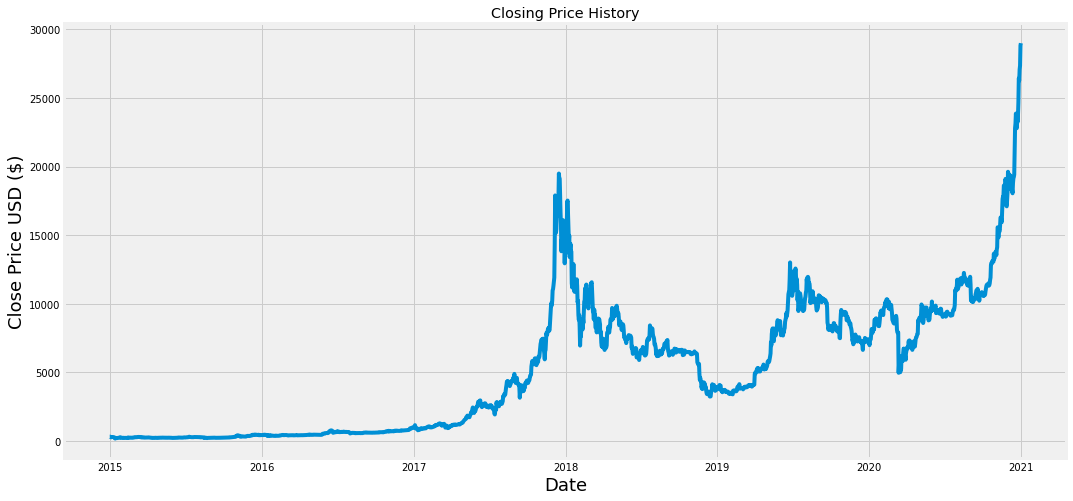

In [3]:
#visualiz the closing price history
plt.figure(figsize=(16,8))
plt.title('Closing Price History')
plt.plot(df['Close'])
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close Price USD ($)',fontsize=18)
plt.show()

In [4]:
# create a new dataframe with only the close col
data = df.filter(['Close'])
#convert the dataframe to a numpy array
dataset = data.values
#get the number of rows top train the model
training_data_len = math.ceil(len(dataset) * .8)
training_data_len

1751

In [5]:
#scale the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)
scaled_data

array([[0.00472342],
       [0.00475058],
       [0.00357273],
       ...,
       [0.94312708],
       [0.99442237],
       [1.        ]])

In [6]:
#Create the training dataset
#Create the scaled training dataset
train_data = scaled_data[0:training_data_len ,:]
#split the dfata into x_train and y_train datasets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i,0])
    y_train.append(train_data[i,0])
    if i <=61:
        print (x_train)
        print(y_train)
        print()

[array([0.00472342, 0.00475058, 0.00357273, 0.00298686, 0.00334347,
       0.00374991, 0.0040326 , 0.00365138, 0.00389628, 0.00335464,
       0.00303768, 0.00311179, 0.0016569 , 0.        , 0.00110121,
       0.00104061, 0.00073402, 0.00111839, 0.00127527, 0.00115225,
       0.00169285, 0.00191867, 0.00190039, 0.00241968, 0.00262337,
       0.00330874, 0.00296188, 0.00193633, 0.00192238, 0.00167647,
       0.00136558, 0.00169545, 0.002086  , 0.00170572, 0.00169132,
       0.00135333, 0.00153218, 0.00172258, 0.00157194, 0.00145738,
       0.00144798, 0.00142529, 0.00151477, 0.00198879, 0.00274837,
       0.0019679 , 0.00193383, 0.00227269, 0.00201998, 0.00215726,
       0.00227855, 0.00230474, 0.00200787, 0.002109  , 0.00210355,
       0.00205967, 0.00202344, 0.00262719, 0.00264228, 0.00284832])]
[0.0033849677578897796]

[array([0.00472342, 0.00475058, 0.00357273, 0.00298686, 0.00334347,
       0.00374991, 0.0040326 , 0.00365138, 0.00389628, 0.00335464,
       0.00303768, 0.00311179, 0.

In [7]:
#convert the x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

In [8]:
#reshape the data - LSTM epect 3 dim
x_train = np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))
x_train.shape


(1691, 60, 1)

In [9]:
#build the LSTM model
#from tensorflow.python.framework import tensor_util
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [10]:
#compile the model
model.compile(optimizer='adam',loss='mean_squared_error')

In [11]:
#train the model
model.fit(x_train,y_train,batch_size=1,epochs=1)

1691/1691 [==============================] - 68s 28ms/step - loss: 0.0016


In [12]:
#create the testing dataset
#Create a new array containing scaled values from index 
test_data = scaled_data[training_data_len -60: , :]
#create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60,len(test_data)):
  x_test.append(test_data[i-60:i,0])


In [13]:
#convert the data to a numpy array
x_test = np.array(x_test)

In [15]:
x_test = np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))

In [18]:
#Get the models predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

In [19]:
#Get the root mean squared error (RMSE)
rmse =np.sqrt(np.mean(predictions - y_test)**2)
rmse

160.3121357444222

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


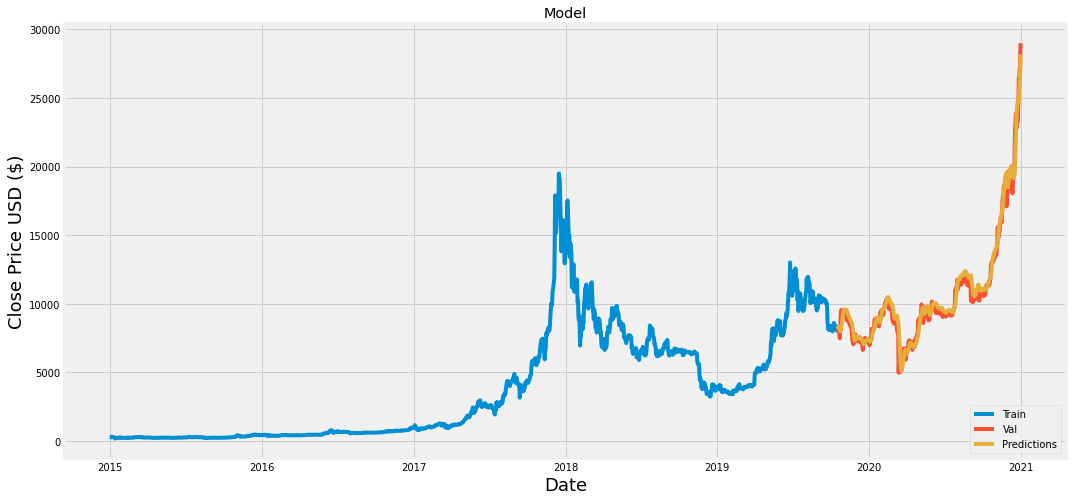

In [25]:
#plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions']=predictions
#visualize the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close Price USD ($)',fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close','Predictions']])
plt.legend(['Train','Val','Predictions'], loc = 'lower right')
plt.show()



In [26]:
#Show the valid and predicted prices
valid

,Close,Predictions
Date,,
2019-10-17,7973.207520,8399.201172
2019-10-18,7988.560547,8314.239258
2019-10-19,8222.078125,8239.274414
2019-10-20,8243.720703,8219.722656
2019-10-21,8078.203125,8235.543945
...,...,...
2020-12-27,26272.294922,25468.546875
2020-12-28,27084.808594,26063.273438
2020-12-29,27362.437500,26741.439453


In [36]:
#get the quote
btc_quote = web.DataReader('BTC-USD', data_source='yahoo',start='2015-01-01', end = '2021-06-24')
#create a new dataframe
new_df = btc_quote.filter(['Close'])
#get the last 60 day closing price values and convert dataframe to an array
last_60_days = new_df[-60:].values
#scale the data to be values betwwen 0 and 1
last_60_days_scaled = scaler.transform(last_60_days)
#create an empty list
x_test = []
#append the past 60 days
x_test.append(last_60_days_scaled)
#convert the x_test data set to a numpy array
x_test = np.array(x_test)

x_test = np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))
#get the predicted scaled price
pred_price = model.predict(x_test)
#undo the scaling
pred_price = scaler.inverse_transform(pred_price)
print(pred_price)


[[33036.867]]


In [35]:
#get the quote
btc_quote2 = web.DataReader('BTC-USD', data_source='yahoo',start='2021-06-24', end = '2021-06-24')
print(btc_quote2['Close'])

Date
2021-06-25    34404.238281
Name: Close, dtype: float64
